In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.neighbors import KNeighborsClassifier
#import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("/content/dataset.csv", index_col="patient_id" )
data.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
patient_id,,,,,,,,,,,,,,,,,,,,,
25312,66154,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
59342,114252,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
50777,119783,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
46918,79267,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
34377,92056,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [ ]:
data = data.fillna(0)
data.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
patient_id,,,,,,,,,,,,,,,,,,,,,
25312,66154,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0.0,0
59342,114252,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0.0,0
50777,119783,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0.0,0
46918,79267,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0.0,0
34377,92056,33,19.0,0.00,0,Caucasian,M,188.0,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0.0,0


In [ ]:
data.columns

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'icu_admit_source', 'icu_id',
       'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       '

In [ ]:
feature = ["age", "gender", "bmi", "apache_4a_hospital_death_prob", "heart_rate_apache", "map_apache", "temp_apache", "d1_glucose_max", "d1_potassium_max", "gcs_eyes_apache", "gcs_motor_apache", "gcs_verbal_apache", "diabetes_mellitus", "hepatic_failure", "immunosuppression", "solid_tumor_with_metastasis"]

X = data[feature]
y = data["hospital_death"]
X.head()
y.head()


,hospital_death
patient_id,
25312,0
59342,0
50777,0
46918,0
34377,0


In [ ]:
X.shape

(91713, 16)

In [ ]:
data.shape

(91713, 84)

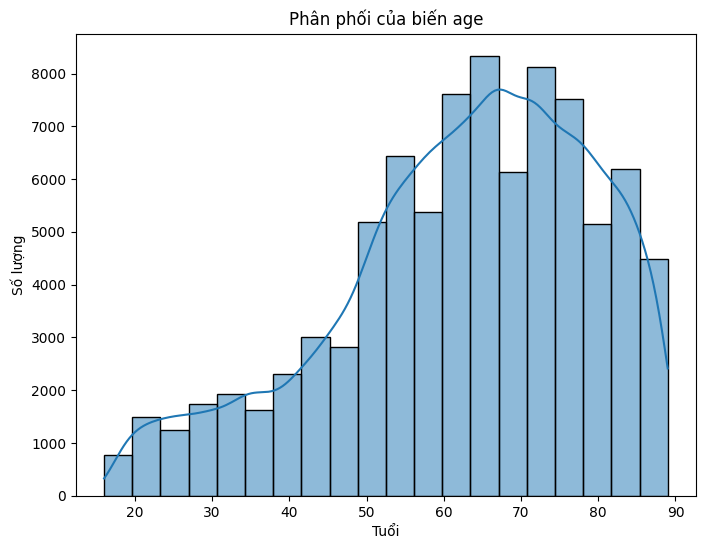

In [ ]:
  # Vẽ histogram cho biến 'age'
  plt.figure(figsize=(8, 6))
  sns.histplot(data=data, x='age', bins=20, kde=True)
  plt.title('Phân phối của biến age')
  plt.xlabel('Tuổi')
  plt.ylabel('Số lượng')
  plt.show()

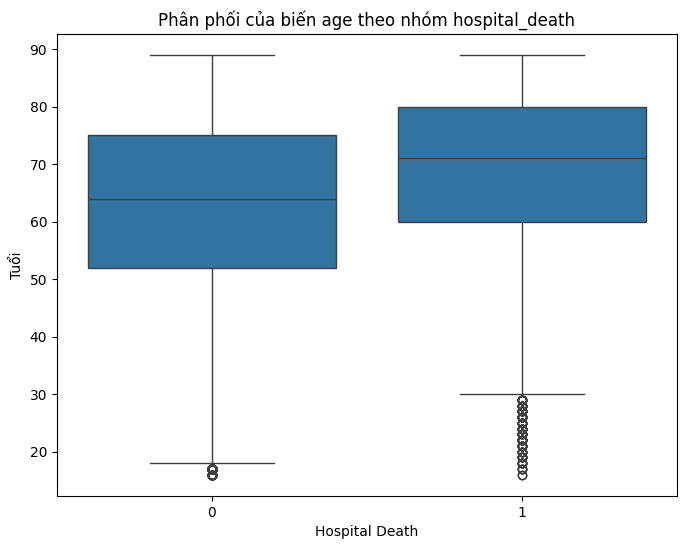

In [ ]:
# Vẽ box plot cho biến 'age' theo nhóm 'hospital_death'
import matplotlib.pyplot as plt
#import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='hospital_death', y='age')
plt.title('Phân phối của biến age theo nhóm hospital_death')
plt.xlabel('Hospital Death')
plt.ylabel('Tuổi')
plt.show()

<ipython-input-70-41f6b5efc18f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='apache_2_bodysystem', palette="dark", ax=axs[0])
<ipython-input-70-41f6b5efc18f>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)


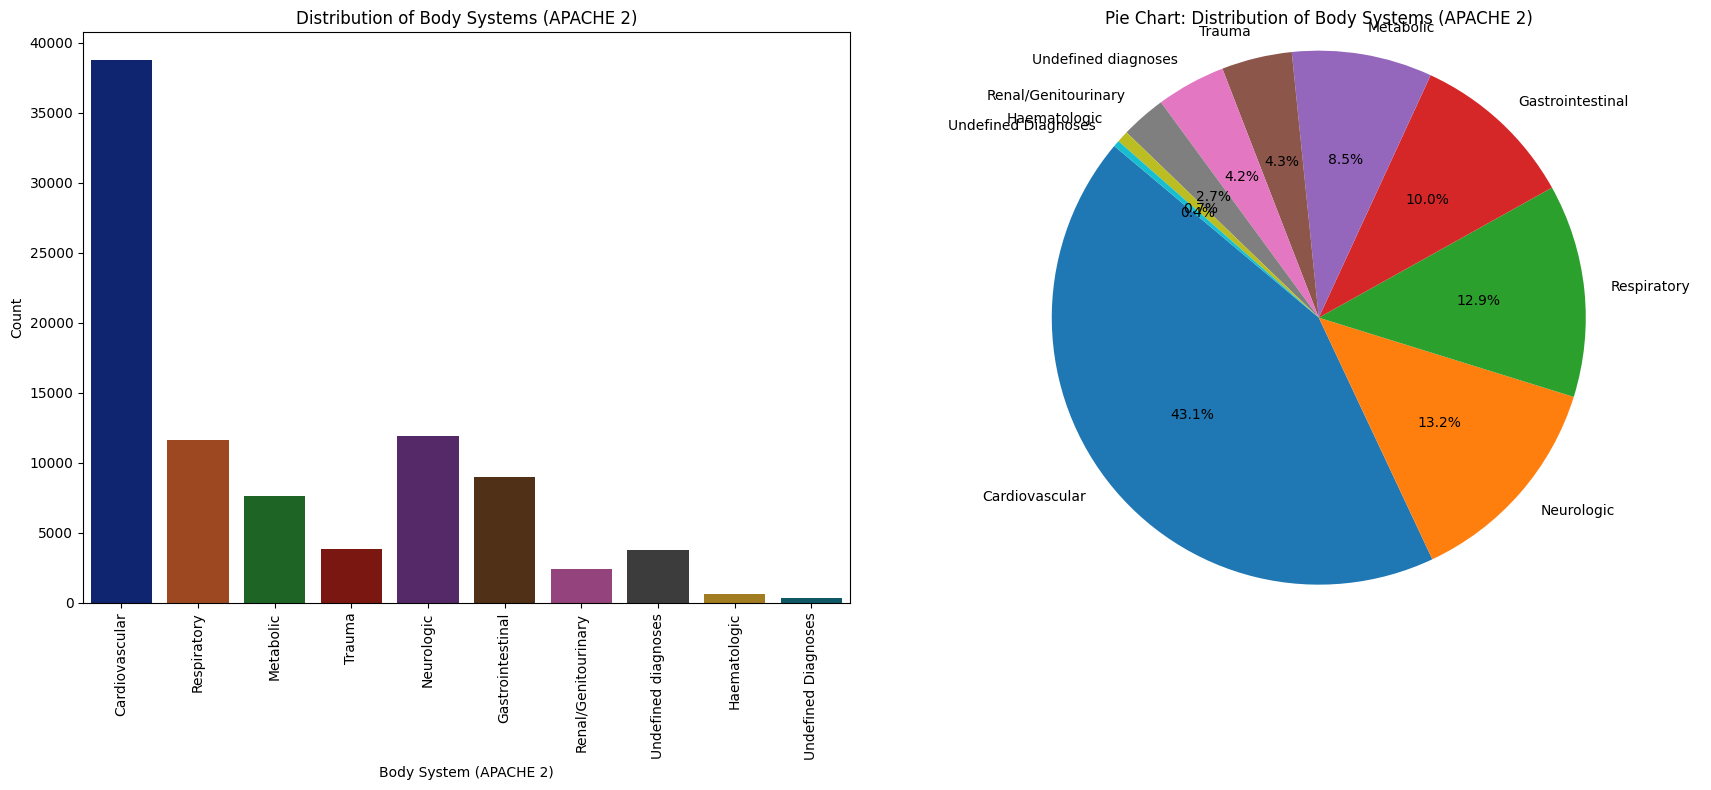

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plot the countplot for 'apache_2_bodysystem'
sns.countplot(data=data, x='apache_2_bodysystem', palette="dark", ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Body System (APACHE 2)')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Body Systems (APACHE 2)')

# Create a pie chart for the distribution of 'apache_2_bodysystem'
counts = data['apache_2_bodysystem'].value_counts()
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Pie Chart: Distribution of Body Systems (APACHE 2)')
axs[1].axis('equal')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()





In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# ... (rest of your code) ...


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
test_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')
test_accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy here

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


Test Metrics:
Accuracy: 0.9245
Precision: 0.8945
Recall: 0.9245
F1 Score: 0.8974


Labels with no predictions: set()


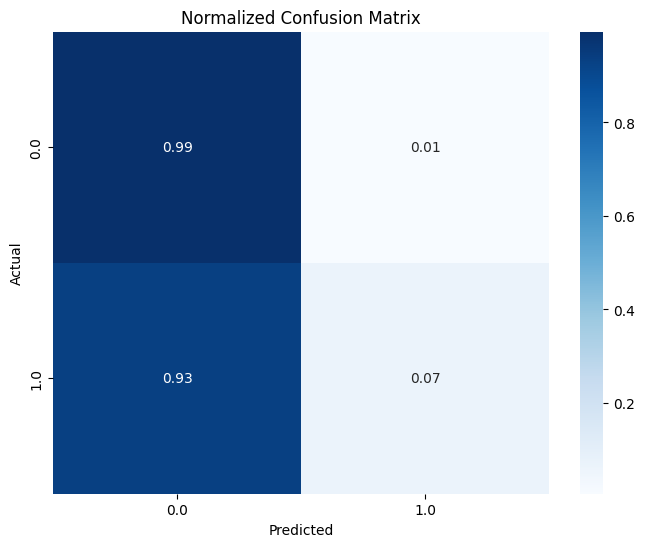

In [ ]:
missing_labels = set(np.unique(y_test)) - set(np.unique(y_pred))
print("Labels with no predictions:", missing_labels)

# Compute and normalize confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# Get unique labels
labels = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

In [ ]:
# Danh sách để lưu kết quả trung bình accuracy
k_values = range(1, 51)  # k từ 1 đến 50
mean_accuracies = []

# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold


# Sử dụng Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for k in k_values:
    acc_scores = []  # Lưu accuracy của từng fold
    knn = KNeighborsClassifier(n_neighbors=k)

    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]

        # Use .iloc to access data by position
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Huấn luyện mô hình trên tập train fold
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_val_fold)

        # Đánh giá accuracy
        acc_scores.append(accuracy_score(y_val_fold, y_pred))

    # Lưu lại trung bình accuracy của 5 folds
    mean_accuracies.append(np.mean(acc_scores))

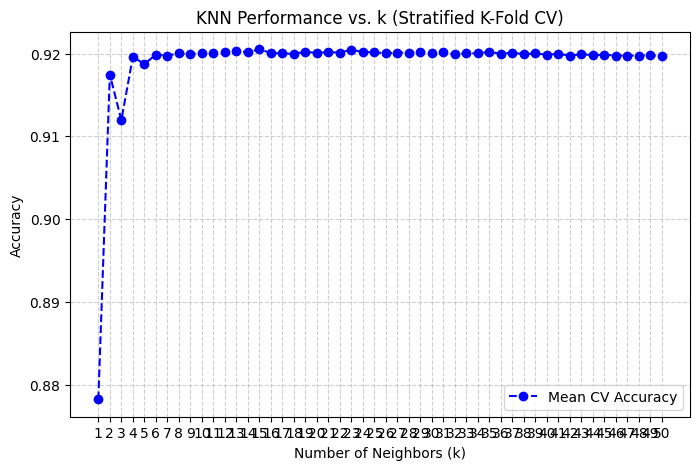

In [ ]:
# Vẽ biểu đồ Accuracy theo k
plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_accuracies, marker="o", linestyle="--", color="b", label="Mean CV Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Performance vs. k (Stratified K-Fold CV)")
plt.xticks(k_values)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

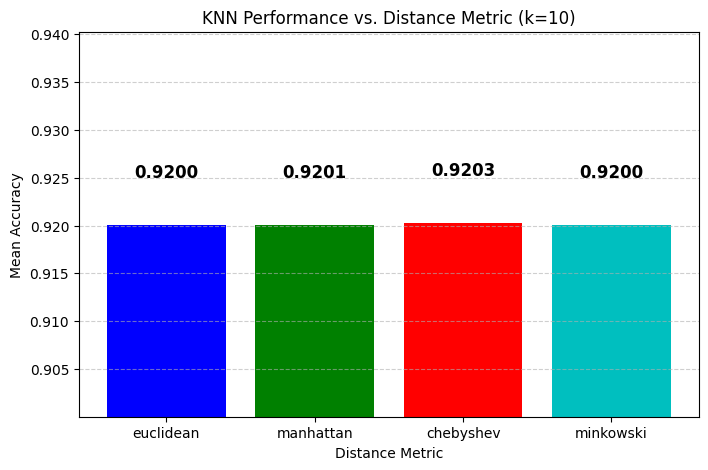

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Danh sách các metric để khảo sát
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
mean_accuracies = []

# Sử dụng Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
k = 10  # Số lượng hàng xóm cố định

# Lặp qua từng metric
for metric in distance_metrics:
    acc_scores = []  # Lưu accuracy của từng fold
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Huấn luyện mô hình trên tập train fold
        knn.fit(X_train_fold, y_train_fold)
        y_pred = knn.predict(X_val_fold)

        # Đánh giá accuracy
        acc_scores.append(accuracy_score(y_val_fold, y_pred))

    # Lưu lại trung bình accuracy của 5 folds
    mean_accuracies.append(np.mean(acc_scores))

# Vẽ biểu đồ Accuracy theo Distance Metric
plt.figure(figsize=(8, 5))
plt.bar(distance_metrics, mean_accuracies, color=['b', 'g', 'r', 'c'])
plt.xlabel("Distance Metric")
plt.ylabel("Mean Accuracy")
plt.title(f"KNN Performance vs. Distance Metric (k={k})")
plt.ylim([min(mean_accuracies) - 0.02, max(mean_accuracies) + 0.02])  # Điều chỉnh giới hạn y
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Hiển thị giá trị accuracy trên mỗi cột
for i, acc in enumerate(mean_accuracies):
    plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

plt.show()